In [1]:
import gym


#定义环境
class MyWrapper(gym.Wrapper):

    def __init__(self):
        env = gym.make('LunarLander-v2',
                       continuous=True,
                       render_mode='rgb_array')
        super().__init__(env)
        self.env = env
        self.step_n = 0

    def reset(self):
        state, _ = self.env.reset()
        self.step_n = 0
        return state

    def step(self, action):
        state, reward, done, _, info = self.env.step(action)
        self.step_n += 1
        if self.step_n >= 400:
            done = True
        return state, reward, done, info


env = MyWrapper()

env.reset()

array([-0.00720062,  1.4170165 , -0.7293671 ,  0.27093425,  0.00835057,
        0.1652125 ,  0.        ,  0.        ], dtype=float32)

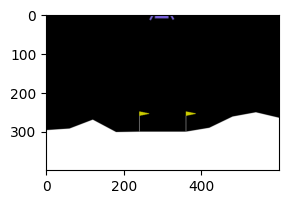

In [2]:
from matplotlib import pyplot as plt

%matplotlib inline


#打印游戏
def show():
    plt.figure(figsize=(3, 3))
    plt.imshow(env.render())
    plt.show()


show()

In [3]:
#认识游戏环境
def test_env():
    print('env.observation_space=', env.observation_space)
    print('env.action_space=', env.action_space)

    state = env.reset()
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action)

    print('state=', state)
    print('action=', action)
    print('next_state=', next_state)
    print('reward=', reward)
    print('done=', done)
    print('info=', info)


test_env()

env.observation_space= Box([-1.5       -1.5       -5.        -5.        -3.1415927 -5.
 -0.        -0.       ], [1.5       1.5       5.        5.        3.1415927 5.        1.
 1.       ], (8,), float32)
env.action_space= Box(-1.0, 1.0, (2,), float32)
state= [-0.00274715  1.4168403  -0.27828535  0.2631164   0.00319017  0.06303567
  0.          0.        ]
action= [-0.97116625 -0.24147968]
next_state= [-0.00549479  1.4221826  -0.2779088   0.23741789  0.00630512  0.06230493
  0.          0.        ]
reward= 0.8999845656363163
done= False
info= {}


In [4]:
from stable_baselines3 import PPO
from stable_baselines3.common.env_util import make_vec_env

#初始化模型
model = PPO(
    policy='MlpPolicy',
    env=make_vec_env(MyWrapper, n_envs=8),  #使用N个环境同时训练
    learning_rate=1e-3,
    n_steps=1024,  #运行N步后执行更新,buffer_size=n_steps*环境数量
    batch_size=64,  #采样数据量
    n_epochs=16,  #每次采样后训练的次数
    gamma=0.99,
    verbose=0)

model

In [5]:
from stable_baselines3.common.evaluation import evaluate_policy

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

/root/anaconda3/envs/pt39/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


(-281.24740603069074, 167.4010756187529)

In [6]:
# #训练
# model.learn(100_0000, progress_bar=True)

# #保存模型
# model.save('save/2.PPO.Lunar Lander Continuous')

In [7]:
#加载模型
model = PPO.load('save/2.PPO.Lunar Lander Continuous')

evaluate_policy(model, env, n_eval_episodes=20, deterministic=False)

(272.2415943570289, 54.26272932228687)

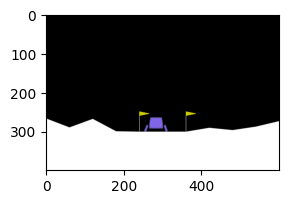

288.2618139933845 215 [0.7179384502343567, 0.7686211759246362, 0.7738843312328356, 1.1586963072128913, 0.8596935515823816, 1.3921985670843389, 0.9493888533870631, 1.3976901913345388, 0.9703761366013168, 0.8998041733740934, 1.2683941418709004, 1.510405461603866, 0.842608355102783, 0.708108347815255, 1.0484193793252166, 0.48942223080354097, 0.9273259623663569, 0.2538313558979439, 0.0836153128059891, -0.07845104111160595, -0.3990694225088305, -1.0524983026904806, -1.1703181849802604, -1.2707567442189145, -1.4085500669297915, -1.4240330197047228, -1.4757410865840086, -1.5140897391261774, -1.5405118062132033, -1.5564933197917696, -1.5633357537496977, -1.5622877977783673, -1.5543552638798417, -1.5405068301204778, -1.3411792527498971, -1.664892654173002, -1.6366451607187855, -1.6051878593306128, -1.570909206838138, -1.5342051800569436, -1.4088987336992158, -1.5819873499792152, -1.5392858458108662, -1.4953000244149166, -1.4501340060389794, -1.4040224692284369, 0.6441812189413441, 2.12044673925

In [17]:
from IPython import display
import random


def test():
    state = env.reset()
    reward_sum = []
    over = False
    while not over:
        action, _ = model.predict(state)
        state, reward, over, _ = env.step(action)
        reward_sum.append(reward)

        if len(reward_sum) % 5 == 0:
            display.clear_output(wait=True)
            show()

    print(sum(reward_sum), len(reward_sum), reward_sum)


test()